# Communication AFS CHLORO

### Données

Trois jeux de données :

- juin COCONEL
- vague 1 & 2 de TRACTRUST (novembre et mai)

Plus le traitement médiatique dans les journaux avec Europresse pour le cadrage

### Quelques éléments de cadrage :

- surgissement de Raoult dans les médias : https://larevuedesmedias.ina.fr/etude-coronavirus-covid19-traitement-mediatique-raoult-chloroquine + article avec Jeremy
- des chiffres très élevés annoncés pour la croyance (48% pour la lettre Lutaud & al., 2021), ça fait beaucoup ...
- Associé à l'activité médiatique d'un groupe de médecins, devenu un moment important du paysage, en témoigne le livre Raoult une folie française, et sa critique https://forbetterscience.com/2021/06/22/raoult-une-folie-francaise-book-review-by-alexander-samuel/
- fin de la discussion dans les médias assez rapidement (beaucoup moins de couverture après juillet, CF courbe avec Europresse, donc 4 mois de débats). Suffisamment pour cliver durablement le paysage public et politique. Quel effet de ces formes spécifiques d'établissement de la croyance ?
- A partir de juin, le consensus scientifique commence à se constituer avec les résultats de discovery et recovery (Pearson, 2021) même si des acteurs continuent à défendre publiquement (Raoult) l'HC pour le traitement précoce, et que des essais continent à être menés à travers la planète

Cela pose plusieurs questions que la sociologie pourrait explorer ?

- [Médiatisation] Parmi toutes les propositions de traitement, comment l'HC est devenu aussi visible comme principal espoir contre le COVID ? Comment s'est fait le travail de médiatisation public de ce traitement ? En particulier, quelle place a occupé Didier Raoult dans cette communication publique
- [Controverse publique] Quel a été la trajectoire médiatique des débats sur l'efficacité de l'HC ? En particulier quelle a été la séparation entre controverse scientifique et débat médiatique ? Quels sont été les acteurs de ces polémiques ?
- [Conséquence] Quelles ont été les conséquences sur la prise en charge de la maladie ? Sur la confiance dans les médecins (Lutaud & al, 2021), dans les scientifiques et dans l'espace public ? Quel effet durable sur le public ? Quels sont les principaux facteurs favorisant cette croyance ?

Et plus généralement, cet épisode amène des questions intéressant la sociologie plus générale 
- [Croyance] Quels sont les principaux déterminants de la croyance ? En particulier, sur ces sujets touchant la médecine et la gestion publique d'une épidémie, les facteurs liés à la perception politique de la gestion et son bien fondé sont mêlés.

-> d'un point de vue micro, les mécanismes de confiance peuvent être décrit de manière multifactorielle : Trust , expertise and the controversy over Chloroquine, Orrigi et al., 2021


Pourquoi c'est important de poser ces questions sur l'HC ?

- la croyance des patients a un impact sur la prescription (Lutaud, 2021)
- parce que c'est un sujet qui a été mondialement publicisé et à ce titre est une bonne quasi-expérience pour étudier le rapport à la connaissance médicale (et plus généralement la sociologie des croyances)
- parce que cela engage la question de la participation du public à la médecine (Berlivet et Lowy, 2020) et les conditions de légitimité des autorités médicales, que certains ont instrumentalisé
- comme la question de la désinformation est importante, la question de la rémanence de celle-ci l'est aussi (misinfor-mation represents a secondary challenge to public health efforts in controlling an epi-demic/pandemic)

In [26]:
import pandas as pd
import pyreadstat
import pyshs
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns


import researchpy as rp
from scipy.stats import chi2_contingency
from scipy import stats

def labels(x,meta):
    return meta.value_labels[meta.variable_to_label[x]]
def question(x,meta):
    return meta.column_names_to_labels[x]

### Chargement des trois jeux de données

Quelques limites de comparaison :
- pas la même question COCONEL et TRACTRUST
- pas de question sur la confiance dans COCONEL

In [230]:
data1, meta1 = pyreadstat.read_sav("../../Projets/Questionnaire chloro/Données/Data_CORO_V14.sav")
data2, meta2 = pyreadstat.read_sav('../../Projets/Questionnaire CS/conseilscientifique/SujetA.sav')
data3, meta3 = pyreadstat.read_sav('../../Projets/Questionnaire CS/conseilscientifique/Data_118230.sav')

data1["vague"] = "COCONEL"
data2["vague"] = "TRACTRUST1"
data3["vague"] = "TRACTRUST2"

# Ajout des variables recodées pour la vague 2

# Variables générales

data1["sexe"] = data1["SEXE"].replace({1:"Homme",2:"Femme"})
data2["sexe"] = data2["SEXE"].replace({1:"Homme",2:"Femme"})
data3["sexe"] = data3["SEXE"].replace({1:"Homme",2:"Femme"})

data1["age"] = pd.cut(data1["AGE"],[17,25,35,45,55,65,100])
data2["age"] = pd.cut(data2["AGE"],[17,25,35,45,55,65,100])
data3["age"] = pd.cut(data3["AGE"],[17,25,35,45,55,65,100])

data1["age2"] = pd.cut(data1["AGE"],[17,35,55,70,100],labels=["17-34","35-54","55-79","70-100"])
data2["age2"] = pd.cut(data2["AGE"],[17,35,55,70,100],labels=["17-34","35-54","55-79","70-100"])
data3["age2"] = pd.cut(data3["AGE"],[17,35,55,70,100],labels=["17-34","35-54","55-79","70-100"])

def reco(x):
    if x in [1,2]:
        return x
    if x in [3,4,5]:
        return "3-5"
    return "6 et +"
data1["foyer"] = data1["FOYER"].apply(reco)
data2["foyer"] = data2["FOYER"].apply(reco)
data3["foyer"] = data3["FOYER"].apply(reco)

reco = {1.0: 'Catholique',
 2.0: 'Catholique',
 3.0: 'Protestant ou évangélique',
 4.0: 'Musulman',
 5.0: 'Juif',
 6.0: 'Autre religion',
 7.0: 'Sans religion',
 8.0: 'Vous ne souhaitez pas répondre'}
#data1["religion"] = data1["REL1"].replace(reco)
data2["religion"] = data2["REL1"].replace(reco)
data3["religion"] = data3["REL1"].replace(reco)

data1["csp"] = data1["PI1"].replace(labels("PI1",meta1))
data2["csp"] = data2["PI1"].replace(labels("PI1",meta2))
data3["csp"] = data3["PI1"].replace(labels("PI1",meta3))

reco = {1:"1 - inf bac",2:"1 - inf bac",3:"1 - inf bac",4:"1 - inf bac",
        5:"1 - inf bac", 6:"1 - inf bac",7:"1 - inf bac",8:"2 - bac",9:"2 - bac",
        10:"3 - sup bac",11:"3 - sup bac"}
data1["diplome"] = data1["DIPL2"].replace(reco)
data2["diplome"] = data2["DIPL2"].replace(reco)
data3["diplome"] = data3["DIPL2"].replace(reco)

reco = {1.0: '1 - 0-1000€',2.0: '2 - 1000-2000€',
        3.0: '2 - 1000-2000€',4.0: '3 - 2000-4000€',
        5.0: '3 - 2000-4000€',6.0: '4 - 4000€ and more',7.0: '5 - NA'}
data1["revenus"] = data1["REV"].replace(reco)
data2["revenus"] = data2["REV"].replace(reco)
data3["revenus"] = data3["REV"].replace(reco)

reco = {1.0: '1 - Favorable',
 2.0: '1 - Favorable',
 3.0: '2 - Défavorable',
 4.0: '2 - Défavorable'}

data1["vac_general"] = data1['OA202'].replace(reco)
data2["vac_general"] = data2['QA32'].replace(reco)
data3["vac_general"] = data3['OA29'].replace(reco)


reco = {1.0: '1 - Tout à fait confiance',
 2.0: '2 - Plutôt confiance',
 3.0: '3 - Plutôt pas confiance',
 4.0: '5 - Pas du tout confiance',
 5.0: '5 - Vous ne savez pas'}


# Variables science
reco = {1.0: '1 - Yes', 2.0: '1 - Yes', 3.0: '2 - No', 4.0: '2 - No'}
data1["interetscience"] = data1["OA194"].replace(reco)
data2["interetscience"] = data2["QA18"].replace(reco)
data3["interetscience"] = data3["OA19"].replace(reco)

reco = {1.0: '1 - Plus de bien que de mal',
 2.0: '2 - A peu près autant de bien que de mal',
 3.0: '3 - Plus de mal que de bien',
 4.0: '4 - Vous ne savez pas'}
data1["apportscience"] = data1["OA195"].replace(reco)
reco = {1.0: '1 - Plus de bien que de mal',
 2.0: '3 - Plus de mal que de bien',
 3.0: '2 - A peu près autant de bien que de mal',
 4.0: '4 - Vous ne savez pas'}
data2["apportscience"] = data2["QA19"].replace(reco)
data3["apportscience"] = data3['OA20'].replace(reco)

reco = {1.0: '1 - Confiance',
 2.0: '1 - Confiance',
 3.0: '2 - Pas confiance',
 4.0: '2 - Pas confiance',
 5.0: '3 - Vous ne savez pas'}

#data1["confiancescience"] = data1['OA221'].replace(reco) ON A PAS CET ITEM DANS COCONEL
data2["confiancescience"] = data2['QA9_r5'].replace(reco)
data3["confiancescience"] = data3['OA8_r5'].replace(reco)

data2["confiancegouvernement"] = data2['QA9_r9'].replace(reco)
data3["confiancegouvernement"] = data3['OA8_r9'].replace(reco)



reco1 = {1:1,2:1,3:0,4:0,5:0}
data2["ind_confiance"] = (data2[["QA9_r%d"%i for i in range(1,13)]].replace(reco1).sum(axis=1)/(12*1))
data2["ind_confianceC"] = pd.qcut(data2["ind_confiance"],[0,0.25,0.5,0.75,1],["Q1 - Low","Q2","Q3","Q4 - High"])
data3["ind_confiance"] = (data3[["OA8_r%d"%i for i in range(1,13)]].replace(reco1).sum(axis=1)/(12*1))
data3["ind_confianceC"] = pd.qcut(data3["ind_confiance"],[0,0.25,0.5,0.75,1],["Q1 - Low","Q2","Q3","Q4 - High"])


# Variables politique

data1["parti"] = data1["PROX"].replace(labels("PROX",meta1))
data2["parti"] = data2["PROX"].replace(labels("PROX",meta2))
data3["parti"] = data3["PROX"].replace(labels("PROX",meta3))

reco = {1.0: '5 - Extrême gauche', 2.0: '5 - Extrême gauche', 3.0: '5 - Extrême gauche', 4.0: '5 - Extrême gauche',
 5.0: '3 - Gauche', 6.0: '3 - Gauche', 7.0: '3 - Gauche',
 8.0: '1 - Centre', 9.0: '1 - Centre', 10.0: '1 - Centre', 11.0: '1 - Centre',
 12.0: '4 - Droite', 13.0: '4 - Droite',
 14.0: '6 - Extrême droite', 15.0: '6 - Extrême droite', 16.0: '6 - Extrême droite', 17.0: '6 - Extrême droite',
 18.0: '7 - Une autre formation politique',
 19.0: '2 - Aucune formation politique'}

data1["PROXPARTI"] = data1["PROX"].replace(reco)
data2["PROXPARTI"] = data2["PROX"].replace(reco)
data3["PROXPARTI"] = data3["PROX"].replace(reco)


reco = {1:"Frequently",2:"Frequently",3:"Rarely",4:"Rarely",5:"Rarely"}
data1["infopol"] = data1["OA191"].replace(reco)
data2["infopol"] = data2["QA2"].replace(reco)
data3["infopol"] = data3["OA2"].replace(reco)

reco = {1:1,2:1,3:0,4:0,5:0}
data1["politisation"] = data1["OA190"].replace(reco) + data1["OA191"].replace(reco) + data1["OA193"].replace(reco) 
data1["politisationC"]  = data1["politisation"].replace({3:"3 - High",2:"2 - Average",1:"1 - Low",0:"1 - Low"})
data2["politisation"] = data2["QA1"].replace(reco) + data2["QA2"].replace(reco) + data2["QA4"].replace(reco) 
data2["politisationC"]  = data1["politisation"].replace({3:"3 - High",2:"2 - Average",1:"1 - Low",0:"1 - Low"})
data3["politisation"] = data3["OA1"].replace(reco) + data3["OA2"].replace(reco) + data3["OA4"].replace(reco) 
data3["politisationC"]  = data3["politisation"].replace({3:"3 - High",2:"2 - Average",1:"1 - Low",0:"1 - Low"})


# Variable chloroquine -> attention, dans la première vague on a fait un filtre sur le fait de savoir si oui ou non
# ils avaient entendu parler du débat

reco = {1:"1 - HC est un bon traitement",2:"2 - HC n'est pas un bon traitement",
        3:"3 - Conaissances insuffisantes",4:"4 - NSP"}
data1["HC_savoir"] = data1["OA200"].replace(labels("OA200",meta1))
# Croyance dans la chloroquine vague 1
reco = {3:"Incertains",4:"Sans avis",1:"Croyant",2:"Non croyant"}
data1["profil_hc"] = data1["OA201"].replace(reco)
data1["profil_hc"] = data1["profil_hc"].fillna("Ne connaissent pas")
data1["Croyant"] = data1["profil_hc"].apply(lambda x : 1 if x=="Croyant" else 0)

data1["HC"] = data1["OA201"].replace(reco)
data2["HC"] = data2["QA29"].replace(reco)
data3["HC"] = data3["OA27"].replace(reco)


## Dès juin un sujet à part

In [259]:
reco = {1.0: '1 - Pas du tout crédible',
 2.0: '2 - Plutôt pas crédible',
 3.0: '3 - Plutôt crédible',
 4.0: '4 - Tout à fait crédible'}

questions = {"OA197_r1":"Seconde vague",
 "OA197_r2":"Nécessité du confinement",
 "OA197_r3":"Protection des masques",
 "OA197_r4":"Gravité du COVID-19 sur la santé",
 "OA197_r5":"Efficacité de l'HC",
}

table = {}

for i in questions:
    table[questions[i]] = pyshs.tri_a_plat(data1.replace(reco),i,"RED")["Pourcentage (%)"]

pd.DataFrame(table)

,Seconde vague,Nécessité du confinement,Protection des masques,Gravité du COVID-19 sur la santé,Efficacité de l'HC
1 - Pas du tout crédible,7.0,9.6,14.2,7.3,17.4
2 - Plutôt pas crédible,23.4,20.2,24.4,19.6,37.9
3 - Plutôt crédible,50.9,52.4,44.8,49.4,37.8
4 - Tout à fait crédible,18.7,17.9,16.6,23.7,6.8
Total,100.0,100.1,100.0,100.0,99.9


Par rapport aux autres sujets qui sont discuté sur l'épidémie de COVID, l'efficacité de l'HC est clairement marqué par une moindre crédbilité générale

## Analyse de l'évolution sur les trois vagues

- des évolutions de la couverture de la presse (voir graph Europresse)
- une évolution de l'intérêt public à suivre avec google trends par ex. https://trends.google.com/trends/explore?date=today%205-y&geo=FR&q=chloroquine,hydroxychloroquine,raoult (ou Twitter ??)

Des points de mesure de l'opinion générale

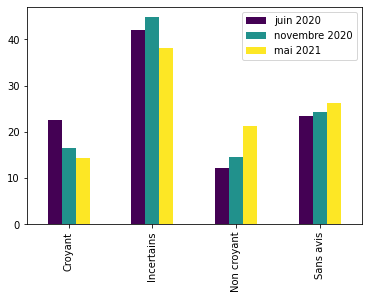

In [62]:
pd.DataFrame({"juin 2020":pyshs.tri_a_plat(data1,"HC","RED")["Pourcentage (%)"],
 "novembre 2020":pyshs.tri_a_plat(data2,"HC","RED")["Pourcentage (%)"],
 "mai 2021":pyshs.tri_a_plat(data3,"HC","RED")["Pourcentage (%)"]}).drop("Total").plot(kind="bar",cmap="viridis")


Quelques messages :

- une portion somme toute restreinte (environ 1/5 croyant en l'efficacité, beaucoup d'incertitude, attention à l'interprétation trop directe)
- une stabilité dans le temps de la croyance sur l'efficacité d'une thérapie, avec une baisse de la croyance, une augmentation de la non croyance, et un maitien de l'incertitude -> cela pose la question de la rectification dans l'espace public de l'incertitude générée par les controverses, en témoigne aussi ce que l'on observe sur la vaccination ?

### Quelle est la composition de chaque groupe ? Est-ce que cette composition évolue ?

Pour chaque variable de caractérisation de la population, regarder la composition et les évolutions. L'objectif est donc d'avoir une information sur la morphologie sociale des groupes qui défendent ces idées.

Croyants :

- pas de grosse différence pour le genre (moins de 5 points)
- pas de grosse différence sur la PCS 
- pas de grosse différence sur les diplomes
- pas de grosse différence sur la distribution de revenus
- moins de non étiquetté (27 vs 35), plus d'extrêmes (gauche : 15vs10 ; droite 22vs13), qui va en s'atténuant ensuite, qui se maintient dans le temps
- surreprésentation des individus plus politisés (48 vs 40), se maintient voire augmente
- augmentation de la proportion de ceux qui considèrent que la science apporte plus de mal que de bien (20% vs. 13%) -> potentiel souci avec cette question ???
- surreprésentation des défavorables à la vaccination (35 vs 24), qui se maintient

Non croyances :

- un peu plus masculin (60% contre 48%)
- surreprésentation des cadres et sous représentation des retraités, mais qui s'atténue ensuite
- surreprésentation des diplomés (45 vs 27%)
- surreprésentation des hauts revenus (>4000, 25% contre 12%), qui va en s'atténuant un peu
- plus faible présence des retraités (13 contre 25%), plus forte présence des jeunes (17 vs 9)
- moins de non étiquetté (26 vs 35), surreprésentation du centre 22 vs15, surreprésentation de la gauche (20 vs 13), sous représentation de l'extrême droite (6 vs 13), qui se maintient sauf pour la gauche (mais faible)
- surreprésentation des individus plus politisés (48 vs 40), se maintient voire augmente
- surreprésentation d'une conception positive de la science (50 vs . 37)
- surreprésentation des gens qui s'intéressent à la science (77 vs 65)
- surreprésentation des favorables à la vaccination (85 vs 76), qui se maintient

Autres :
- pas de différences notables sur les sans avis ou les incertains
- sans avis se caractérisent par une surreprésentation des peu politisés (60 vs 43)

Remarques générales : baisse de 15 points de l'intérêt pour la science !!!!!


In [236]:
table = {}
for i in ["age","age2"]:
    t1 = pyshs.tableau_croise(data1,"HC",i,"RED").T.drop("All")
    t2 = pyshs.tableau_croise(data2,"HC",i,"RED").T.drop("All")
    t3 = pyshs.tableau_croise(data3,"HC",i,"RED").T.drop("All")
    t1 = t1.join(t2,rsuffix="_2").join(t3,rsuffix="_3")
    table[i] = t1
pd.concat(table)

HC                    Croyant     Incertains   Non croyant      Sans avis  \
age  (17, 25]    40.5 (10.2%)    58.9 (8.0%)  36.6 (17.2%)    25.8 (6.3%)   
     (25, 35]    44.2 (11.2%)  130.0 (17.7%)  41.5 (19.5%)   52.6 (12.9%)   
     (35, 45]    70.0 (17.7%)  105.9 (14.4%)  22.5 (10.6%)   51.4 (12.6%)   
     (45, 55]    77.3 (19.6%)  133.6 (18.2%)  55.4 (26.1%)   98.8 (24.2%)   
     (55, 65]    65.4 (16.5%)  102.0 (13.9%)  28.3 (13.3%)   77.9 (19.1%)   
     (65, 100]   97.8 (24.7%)  202.6 (27.6%)  28.1 (13.2%)  101.4 (24.9%)   
age2 17-34       84.7 (21.4%)  188.9 (25.8%)  78.1 (36.8%)   78.4 (19.2%)   
     35-54      147.4 (37.3%)  239.5 (32.7%)  77.8 (36.6%)  150.2 (36.8%)   
     55-79       91.1 (23.0%)  150.5 (20.5%)  35.2 (16.6%)  117.7 (28.9%)   
     70-100      72.1 (18.2%)  154.2 (21.0%)  21.3 (10.0%)   61.6 (15.1%)   

HC                        All     Croyant_2   Incertains_2 Non croyant_2  \
age  (17, 25]    161.9 (9.3%)   11.9 (7.1%)   51.0 (11.2%)  21.7 (14.8%)   
     (25, 35]   268.3 (15.3%)  24.6 (14.7%)   76.4 (16.8%)  30.4 (20.7%)   
     (35, 45]   249.9 (14.3%)  35.2 (21.1%)   65.2 (14.3%)  22.5 (15.3%)   
     (45, 55]   365.1 (20.9%)  33.1 (19.8%)   83.5 (18.4%)  22.3 (15.2%)   
     (55, 65]   273.6 (15.6%)  22.1 (13.2%)   62.6 (13.8%)  26.9 (18.3%)   
     (65, 100]  430.0 (24.6%)  40.0 (24.0%)  115.8 (25.5%)  22.8 (15.6%)   
age2 17-34      430.2 (24.6%)  36.5 (21.9%)  127.4 (28.0%)  52.0 (35.5%)   
     35-54      614.9 (35.2%)  68.3 (40.9%)  148.6 (32.7%)  44.8 (30.6%)   
     55-79      394.5 (22.6%)  37.0 (22.2%)   98.4 (21.7%)  34.9 (23.8%)   
     70-100     309.1 (17.7%)  25.1 (15.0%)   80.0 (17.6%)  14.8 (10.1%)   

HC               Sans avis_2          All_2     Croyant_3   Incertains_3  \
age  (17, 25]   32.9 (13.4%)  117.5 (11.6%)    8.3 (5.7%)   44.7 (11.7%)   
     (25, 35]   25.9 (10.5%)  157.3 (15.5%)  25.8 (17.9%)   44.1 (11.5%)   
     (35, 45]   51.1 (20.8%)  174.0 (17.2%)  18.3 (12.7%)   62.6 (16.3%)   
     (45, 55]   47.8 (19.4%)  186.6 (18.4%)  31.7 (21.9%)   61.6 (16.1%)   
     (55, 65]   28.9 (11.7%)  140.6 (13.9%)  28.1 (19.4%)   62.7 (16.4%)   
     (65, 100]  59.5 (24.2%)  238.0 (23.5%)  32.3 (22.4%)  107.5 (28.1%)   
age2 17-34      58.8 (23.9%)  274.8 (27.1%)  34.1 (23.6%)   88.9 (23.2%)   
     35-54      98.9 (40.2%)  360.6 (35.6%)  49.9 (34.6%)  124.1 (32.4%)   
     55-79      45.7 (18.6%)  215.9 (21.3%)  35.6 (24.7%)   92.2 (24.1%)   
     70-100     42.7 (17.4%)  162.7 (16.0%)  24.8 (17.2%)   77.9 (20.3%)   

HC             Non croyant_3   Sans avis_3          All_3  
age  (17, 25]   30.1 (14.0%)  39.5 (15.0%)  122.7 (12.2%)  
     (25, 35]   35.2 (16.4%)  43.2 (16.4%)  148.3 (14.8%)  
     (35, 45]   30.5 (14.2%)  45.7 (17.4%)  157.1 (15.6%)  
     (45, 55]   47.5 (22.1%)  46.5 (17.7%)  187.1 (18.6%)  
     (55, 65]   28.5 (13.3%)  34.0 (12.9%)  153.2 (15.2%)  
     (65, 100]  42.7 (19.9%)  54.1 (20.6%)  236.6 (23.5%)  
age2 17-34      65.3 (30.4%)  82.7 (31.4%)  271.0 (27.0%)  
     35-54      78.0 (36.4%)  92.2 (35.1%)  344.2 (34.2%)  
     55-79      37.4 (17.4%)  46.9 (17.8%)  212.2 (21.1%)  
     70-100     33.8 (15.8%)  41.2 (15.7%)  177.6 (17.7%)

-> La composition du groupe de croyant est assez proche de la population générale

-> C'est la composition des non croyants qui se distingue en partie de la population générale (plus éduqués, plus de revenus)

-> Certains aspects sont partagés entre croyants et non croyants (contre ceux qui hésitent)

-> Cela pose donc la question du groupe en mesure de résister à ces prises de position publique sur un tel sujet, plutôt que de s'intéresser à ceux qui en font les relais.

## Les principaux déterminants de la croyance

Pour identifier l'effet propre des différents facteurs, proposons un modèle. Comme il y a une grande stabilité entre la vague 1 et 2 de TRACTRUST, et que nous posons plus de questions spécifiques au rapport à la science, nous concaténons les données de ces deux vagues.

(PENSER A FAIRE UN CLASSEMENT DES PREDICTEURS)

In [232]:
var = ["vague","HC","sexe","csp","revenus","diplome","age","age2","PROXPARTI","interetscience",
       "apportscience","vac_general","politisationC","RED","confiancescience","confiancegouvernement"]

data = data2[var].append(data3[var])

data["Croyant"] = data["HC"].apply(lambda x : 1 if x=="Croyant" else 0)
data["Noncroyant"] = data["HC"].apply(lambda x : 1 if x=="Non croyant" else 0)

Création du modèle

In [237]:
ind_var= {"sexe":"1. Sexe","revenus":"2. Revenus","diplome":"3. Diplôme","age2":"4. Age",
          "PROXPARTI":"5. Proxitimité partisane","interetscience":"6. Intérêt science",
       "apportscience":"7. Apport science","politisationC":"8. Politisation",
          "confiancescience":"9. Confiance Science","confiancegouvernement":"9. Confiance Gouvernement"}

t_c = pyshs.regression_logistique(data,"Croyant",ind_var,"RED")
t_nc = pyshs.regression_logistique(data,"Noncroyant",ind_var,"RED")

tab = t_c.join(t_nc,rsuffix="_NC")
tab.columns = ["Croyants Odds Ratio","C p","C IC95%","Non Croyants Odds Ratio","NC p","NC IC95%"]
tab

Croyants Odds Ratio  \
Variable                  Modalité                                                       
.Intercept                                                                        0.11   
1. Sexe                   Femme                                                    ref   
                          Homme                                                   1.07   
2. Revenus                1 - 0-1000€                                              ref   
                          2 - 1000-2000€                                           0.7   
                          3 - 2000-4000€                                          0.55   
                          4 - 4000€ and more                                      0.42   
                          5 - NA                                                   0.7   
3. Diplôme                1 - inf bac                                              ref   
                          2 - bac                                                 1.22   
                          3 - sup bac                                             1.27   
4. Age                    17-34                                                    ref   
                          35-54                                                   1.37   
                          55-79                                                   1.39   
                          70-100                                                  1.32   
5. Proxitimité partisane  1 - Centre                                               ref   
                          2 - Aucune formation politique                          0.71   
                          3 - Gauche                                              0.86   
                          4 - Droite                                              1.45   
                          5 - Extrême gauche                                      1.49   
                          6 - Extrême droite                                      1.33   
                          7 - Une autre formation politique                       0.53   
6. Intérêt science        1 - Yes                                                  ref   
                          2 - No                                                  0.89   
7. Apport science         1 - Plus de bien que de mal                              ref   
                          2 - A peu près autant de bien que de mal                1.22   
                          3 - Plus de mal que de bien                             1.51   
                          4 - Vous ne savez pas                                   0.45   
8. Politisation           1 - Low                                                  ref   
                          2 - Average                                             0.77   
                          3 - High                                                1.09   
9. Confiance Gouvernement 1 - Confiance                                            ref   
                          2 - Pas confiance                                       1.94   
                          3 - Vous ne savez pas                                   0.53   
9. Confiance Science      1 - Confiance                                            ref   
                          2 - Pas confiance                                       1.99   
                          3 - Vous ne savez pas                                   0.55   

                                                                        C p  \
Variable                  Modalité                                            
.Intercept                                                           0.0***   
1. Sexe                   Femme                                               
                          Homme                                       0.638   
2. Revenus                1 - 0-1000€                                         
                          2 - 1000-2000€                              0.147   
   

Vérifier la force des associations (classé par la force la plus importante...)

In [238]:
def pseudoR2(mod):
    R = 1-mod.deviance/mod.null_deviance
    return round(R,2)

In [239]:
reg = pyshs.regression_logistique(data,"Croyant",ind_var,"RED",False)
ll = reg.llnull
t = reg.wald_test_terms().table.sort_values("pvalue")
t["partialR2"] = t.apply(lambda x : abs((x["statistic"]-2*x["df_constraint"])/(-2*ll)),axis=1)
t

,statistic,pvalue,df_constraint,partialR2
Intercept,33.831814,6.008818e-09,1,0.018336
confiancescience,19.650831,5.406003e-05,2,0.009015
confiancegouvernement,18.983042,7.548921e-05,2,0.008631
PROXPARTI,21.605595,1.427089e-03,6,0.005533
apportscience,11.767116,8.225027e-03,3,0.003322
revenus,9.923273,4.174016e-02,4,0.001108
politisationC,3.346681,1.876193e-01,2,0.000376
age2,3.806935,2.830805e-01,3,0.001263
diplome,2.420999,2.980483e-01,2,0.000910
interetscience,0.683377,4.084264e-01,1,0.000758


Pour les croyants, les facteurs les plus fortement associé en contrôlant sont la confiance dans la science, qui diminue la probabilité de croire en l'HC, la confiance dans le gouvernement, et enfin l'orientation partisane montrant que les deux dimensions se retrouvent bien liés indépendamment des caractéristiques des répondants beaucoup moins liés à ces aspects.

In [240]:
pseudoR2(reg)

0.09

In [241]:
reg = pyshs.regression_logistique(data,"Noncroyant",ind_var,"RED",False)
ll = reg.llnull
t = reg.wald_test_terms().table.sort_values("pvalue")
t["partialR2"] = t.apply(lambda x : abs((x["statistic"]-2*x["df_constraint"])/(-2*ll)),axis=1)
# Logistic pseudo partial correlation
t

,statistic,pvalue,df_constraint,partialR2
confiancegouvernement,26.638050,0.000002,2,0.011938
apportscience,28.594454,0.000003,3,0.011915
sexe,11.186199,0.000824,1,0.004844
Intercept,11.069147,0.000878,1,0.004783
PROXPARTI,21.517069,0.001481,6,0.005019
interetscience,8.011636,0.004648,1,0.003170
confiancescience,7.930387,0.018964,2,0.002073
diplome,7.818118,0.020059,2,0.002013
revenus,10.248711,0.036440,4,0.001186
politisationC,5.099067,0.078118,2,0.000580


Pour les non croyants, la confiance au gouvernement et dans l'apport dans la science sont les principaux facteurs, ainsi que le genre dans la mesure où il joue un effet de défendre une position claire

In [242]:
pseudoR2(reg)

0.13

On vérifie que les principaux facteurs sont différents, mais que les deux principaux sont l'attitude par rapport à la science + proxpartisane, donc les deux dimensions.